In [1]:
import pandas as pd
import numpy as np


In [2]:

# --- Load your datasets ---
product_details = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\FrostUK\raw_data\product_details.csv")
store_info = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\FrostUK\raw_data\store_info.csv")
supplier_info = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\FrostUK\raw_data\supplier_info.csv")
weather_data = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\FrostUK\raw_data\weather_data.csv")
weekly_sales = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\FrostUK\raw_data\weekly_sales.csv")


#### Merge all data

In [3]:
# --- Step 1: Merge Weekly_Sales with Product_Details ---
frostmark_data = pd.merge(
    weekly_sales,
    product_details,
    on="Product_ID",
    how="left"
)

# --- Step 2: Merge with Store_Info ---
frostmark_data = pd.merge(
    frostmark_data,
    store_info,
    on="Store_ID",
    how="left"
)

# --- Step 3: Merge with Weather_Data ---
# Note: Weather_Data links using Week_Number + Region
frostmark_data = pd.merge(
    frostmark_data,
    weather_data,
    on=["Week_Number", "Region"],
    how="left"
)

# --- Step 4: Merge with Supplier_Info ---
# If Weekly_Sales directly contains Supplier_ID, join on it.
# If Supplier_ID exists in Product_Details instead, merge on that.
if "Supplier_ID" in frostmark_data.columns:
    frostmark_data = pd.merge(
        frostmark_data,
        supplier_info,
        on="Supplier_ID",
        how="left"
    )
elif "Supplier_ID" in product_details.columns:
    frostmark_data = pd.merge(
        frostmark_data,
        supplier_info,
        on="Supplier_ID",
        how="left"
    )




In [4]:
frostmark_data.shape

(37440, 21)

In [5]:
features = [
    "Marketing_Spend",
    "Discount_Percent",
    "Wastage_Units",
    "Price",
    "Product_Category",
    "Shelf_Life_Days",
    "Region",
    "Store_Size",
    "Cold_Storage_Capacity",
    "Avg_Temperature",
    "Rainfall",
    "Holiday_Flag",
    "Lead_Time_Days",
    "Supply_Capacity"
]
target = "Units_Sold"


In [6]:
frostmark_data = frostmark_data[features + [target]]
frostmark_data.head()

,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Category,Shelf_Life_Days,Region,Store_Size,Cold_Storage_Capacity,Avg_Temperature,Rainfall,Holiday_Flag,Lead_Time_Days,Supply_Capacity,Units_Sold
0,670.37,0,718,2.46,Bakery,4,London,12000,3788,9.9,23.0,1,3,48776,4853
1,1089.62,0,641,1.27,Bakery,2,London,12000,3788,9.9,23.0,1,3,46959,4274
2,1004.99,10,632,2.74,Bakery,2,London,12000,3788,9.9,23.0,1,2,11306,4215
3,859.45,20,853,1.82,Bakery,4,London,12000,3788,9.9,23.0,1,2,53748,5768
4,576.70,0,503,3.46,Bakery,4,London,12000,3788,9.9,23.0,1,2,59474,3403


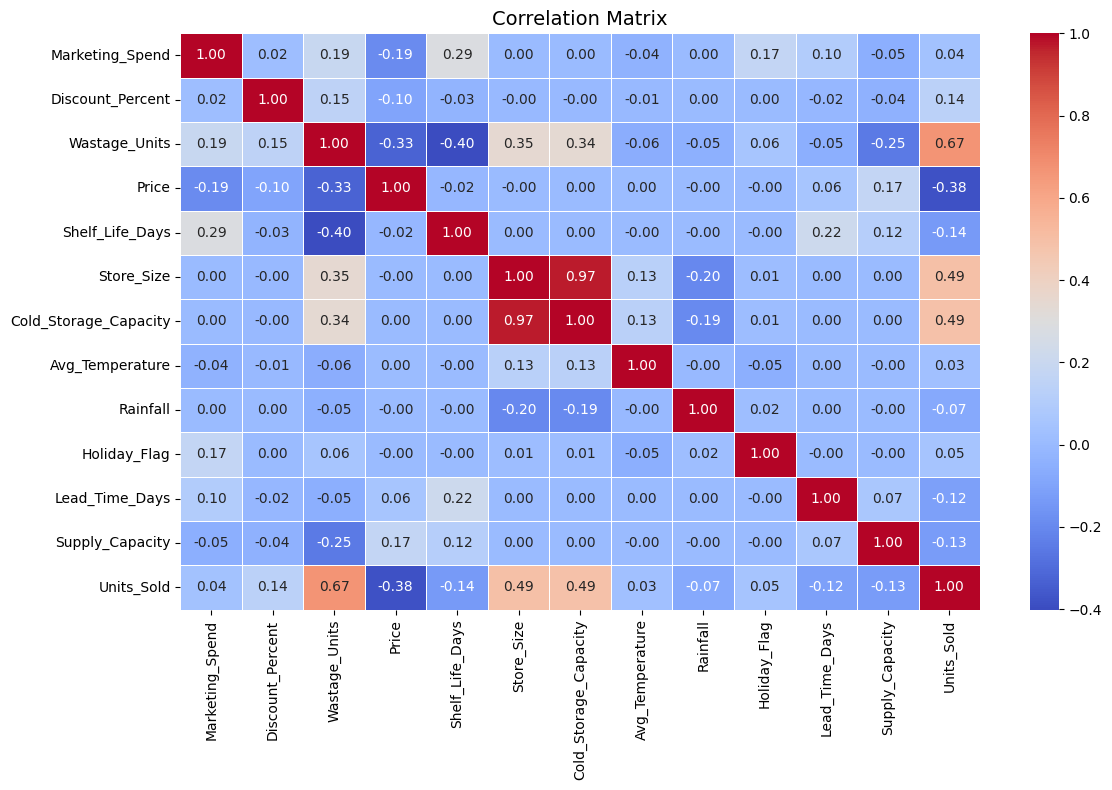

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = frostmark_data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()


In [8]:
frostmark_data[['Store_Size', 'Cold_Storage_Capacity']].corr()

,Store_Size,Cold_Storage_Capacity
Store_Size,1.000000,0.971561
Cold_Storage_Capacity,0.971561,1.000000


In [9]:
frostmark_data.drop('Cold_Storage_Capacity', axis=1, inplace=True)

In [10]:
frostmark_data.head()

,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Category,Shelf_Life_Days,Region,Store_Size,Avg_Temperature,Rainfall,Holiday_Flag,Lead_Time_Days,Supply_Capacity,Units_Sold
0,670.37,0,718,2.46,Bakery,4,London,12000,9.9,23.0,1,3,48776,4853
1,1089.62,0,641,1.27,Bakery,2,London,12000,9.9,23.0,1,3,46959,4274
2,1004.99,10,632,2.74,Bakery,2,London,12000,9.9,23.0,1,2,11306,4215
3,859.45,20,853,1.82,Bakery,4,London,12000,9.9,23.0,1,2,53748,5768
4,576.70,0,503,3.46,Bakery,4,London,12000,9.9,23.0,1,2,59474,3403


In [11]:
frostmark_data = pd.get_dummies(frostmark_data, columns=["Product_Category", "Region"], drop_first=True)
frostmark_data = frostmark_data.astype(int)
frostmark_data.head()

,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Shelf_Life_Days,Store_Size,Avg_Temperature,Rainfall,Holiday_Flag,Lead_Time_Days,Supply_Capacity,Units_Sold,Product_Category_Beverages,Product_Category_Dairy,Product_Category_Meat,Region_Midlands,Region_North East,Region_North West,Region_South East,Region_South West
0,670,0,718,2,4,12000,9,23,1,3,48776,4853,0,0,0,0,0,0,0,0
1,1089,0,641,1,2,12000,9,23,1,3,46959,4274,0,0,0,0,0,0,0,0
2,1004,10,632,2,2,12000,9,23,1,2,11306,4215,0,0,0,0,0,0,0,0
3,859,20,853,1,4,12000,9,23,1,2,53748,5768,0,0,0,0,0,0,0,0
4,576,0,503,3,4,12000,9,23,1,2,59474,3403,0,0,0,0,0,0,0,0


#### split data into training and test set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = frostmark_data.drop(target, axis=1)
y = frostmark_data[['Units_Sold']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#X_train.head()
X_test.head()

,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Shelf_Life_Days,Store_Size,Avg_Temperature,Rainfall,Holiday_Flag,Lead_Time_Days,Supply_Capacity,Product_Category_Beverages,Product_Category_Dairy,Product_Category_Meat,Region_Midlands,Region_North East,Region_North West,Region_South East,Region_South West
36732,636,15,225,6,3,12000,11,10,1,2,53748,0,0,1,0,0,0,0,0
25961,483,0,122,6,242,12000,18,9,0,2,35230,1,0,0,0,0,0,0,0
12307,105,5,69,7,5,5000,4,8,0,2,59474,0,0,1,1,0,0,0,0
27358,731,0,48,0,158,3000,18,10,0,3,46959,1,0,0,0,0,0,0,1
7249,431,0,239,1,2,5000,2,25,0,3,46959,0,0,0,1,0,0,0,0


In [15]:
y_test.head()

,Units_Sold
36732,2151
25961,4883
12307,730
27358,1944
7249,1594


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

linear = LinearRegression()
scaler = StandardScaler()

In [17]:

#X_train_scaled = scaler.fit_transform(X_train)    returns np array
#X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [18]:
X_train_scaled.head()

,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Shelf_Life_Days,Store_Size,Avg_Temperature,Rainfall,Holiday_Flag,Lead_Time_Days,Supply_Capacity,Product_Category_Beverages,Product_Category_Dairy,Product_Category_Meat,Region_Midlands,Region_North East,Region_North West,Region_South East,Region_South West
5514,0.817720,-0.470356,-0.724090,0.886440,0.228223,1.663024,-0.789607,0.630003,-0.413031,1.062905,0.027713,1.740885,-0.581668,-0.577864,-0.500866,-0.390269,-0.390667,-0.268206,-0.603476
34326,-0.590050,0.346346,0.633022,-1.003662,-0.587735,-0.835337,0.191605,0.225635,-0.413031,1.062905,0.148859,-0.574420,-0.581668,-0.577864,-0.500866,2.562332,-0.390667,-0.268206,-0.603476
1406,-0.694484,1.979751,-0.624975,2.020501,-0.577536,-0.835337,-0.299001,1.236555,-0.413031,-0.697164,0.480358,-0.574420,-0.581668,1.730510,-0.500866,-0.390269,-0.390667,-0.268206,1.657068
25610,-0.276748,-0.470356,-0.312382,-0.247622,-0.424543,-0.121520,1.172817,-0.987470,-0.413031,-0.697164,0.862130,-0.574420,1.719193,-0.577864,1.996543,-0.390269,-0.390667,-0.268206,-0.603476
11216,-0.819805,-0.470356,-0.342879,-0.247622,-0.526538,-0.121520,-0.953142,-1.088562,-0.413031,-0.697164,-0.984587,-0.574420,1.719193,-0.577864,1.996543,-0.390269,-0.390667,-0.268206,-0.603476


In [19]:
base_model = linear.fit(X_train_scaled, y_train)
base_model.score(X_test_scaled, y_test)

0.8468220575816134

In [20]:
base_model_pred = base_model.predict(X_test_scaled)

base_model_pred_df = pd.DataFrame(base_model_pred, columns=["Predicted_Units_Sold"])
base_model_pred_df.head()

base_model_pred_df[:10]

,Predicted_Units_Sold
0,2552.841852
1,2518.379904
2,646.356060
3,1222.895285
4,1449.930741
5,2522.485255
6,2270.058213
7,533.148909
8,1060.015007
9,1170.916049


In [21]:
y_test[:10]

,Units_Sold
36732,2151
25961,4883
12307,730
27358,1944
7249,1594
4592,2284
34924,2043
20653,886
34618,1217
11973,834


In [24]:
print(base_model.feature_names_in_)

['Marketing_Spend' 'Discount_Percent' 'Wastage_Units' 'Price'
 'Shelf_Life_Days' 'Store_Size' 'Avg_Temperature' 'Rainfall'
 'Holiday_Flag' 'Lead_Time_Days' 'Supply_Capacity'
 'Product_Category_Beverages' 'Product_Category_Dairy'
 'Product_Category_Meat' 'Region_Midlands' 'Region_North East'
 'Region_North West' 'Region_South East' 'Region_South West']


##### save the model

In [22]:
import pickle

In [23]:
with open(r"C:\Users\psxea2\Desktop\Amdari files\FrostUK\model\lr_model.pkl", "wb") as f:
    pickle.dump(base_model, f)